## Problem Statemenet
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [132]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [133]:
final_df=pd.concat([df_train,df_test])
final_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [134]:
#to check the null values
[feature for feature in final_df.columns if final_df[feature].isnull().sum()>0]

['Product_Category_2', 'Product_Category_3', 'Purchase']

In [135]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [136]:
#Fix the categorical variable
final_df['Gender'].value_counts()

Gender
M    590031
F    193636
Name: count, dtype: int64

In [137]:
final_df['Gender']=final_df['Gender'].map({'M':0,'F':1})

In [138]:
final_df['Gender'].value_counts()

Gender
0    590031
1    193636
Name: count, dtype: int64

In [139]:
#drop the user_id
final_df.drop(['User_ID'],inplace=True,axis=1)

In [140]:
final_df['Age'].value_counts()

Age
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: count, dtype: int64

In [141]:
final_df['Age']=final_df['Age'].map({'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6})# or we can use label encoder

In [142]:
final_df['Age'].value_counts()

Age
2    313015
3    156724
1    141953
4     65278
5     54784
6     30579
0     21334
Name: count, dtype: int64

In [143]:
final_df['City_Category'].value_counts()

City_Category
B    329739
C    243684
A    210244
Name: count, dtype: int64

In [144]:
final_df = pd.concat([final_df, pd.get_dummies(final_df['City_Category'], drop_first=True)], axis=1)
final_df.drop(columns=['City_Category'], inplace=True)


In [145]:
final_df.head(2)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,0,10,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,1,0,10,2,0,1,6.0,14.0,15200.0,False,False


In [146]:
final_df['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1     276425
2     145427
3     135428
4+    120671
0     105716
Name: count, dtype: int64

In [147]:
final_df['Stay_In_Current_City_Years'] = final_df['Stay_In_Current_City_Years'].str.replace('4+', '4')


In [148]:
final_df['Marital_Status'].value_counts()

Marital_Status
0    462538
1    321129
Name: count, dtype: int64

In [149]:
final_df['Product_Category_1'].value_counts()

Product_Category_1
5     215950
1     200699
8     162294
11     34440
2      34056
6      29326
3      28791
4      16756
16     13933
15      8984
13      7930
10      7373
12      5610
7       5345
18      4436
20      2550
14      2186
19      1603
17       801
9        604
Name: count, dtype: int64

In [150]:
final_df['Product_Category_2'].value_counts()#Discrete continuous so we replace the category value with mode

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [151]:
final_df['Product_Category_3'].value_counts()#Discrete continuous so we replace the category value with mode

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [152]:
final_df['Product_Category_2'].fillna(final_df['Product_Category_2'].mode()[0],inplace=True)

C:\Users\Arun\AppData\Local\Temp\ipykernel_1540\4047825362.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['Product_Category_2'].fillna(final_df['Product_Category_2'].mode()[0],inplace=True)


In [153]:
final_df['Product_Category_2'].mode()[0]

np.float64(8.0)

In [154]:
final_df['Product_Category_3'].fillna(final_df['Product_Category_3'].mode()[0],inplace=True)

C:\Users\Arun\AppData\Local\Temp\ipykernel_1540\3768177217.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['Product_Category_3'].fillna(final_df['Product_Category_3'].mode()[0],inplace=True)


In [155]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int64(5), object(2)
memory usage: 67.3+ MB


In [156]:
final_df['Stay_In_Current_City_Years']=final_df['Stay_In_Current_City_Years'].astype('int64')

In [157]:
final_df['B']=final_df['B'].astype('int64')

In [158]:
final_df['C']=final_df['C'].astype('int64')

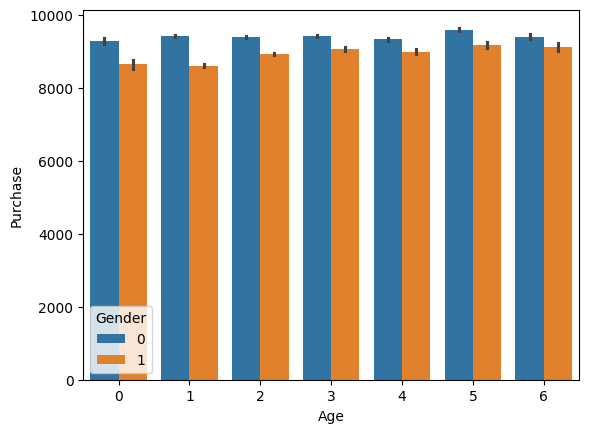

In [159]:
# Visualization Age and Purchased
sns.barplot(data=final_df,x=final_df['Age'],y=final_df['Purchase'],hue=final_df['Gender'])
plt.show()

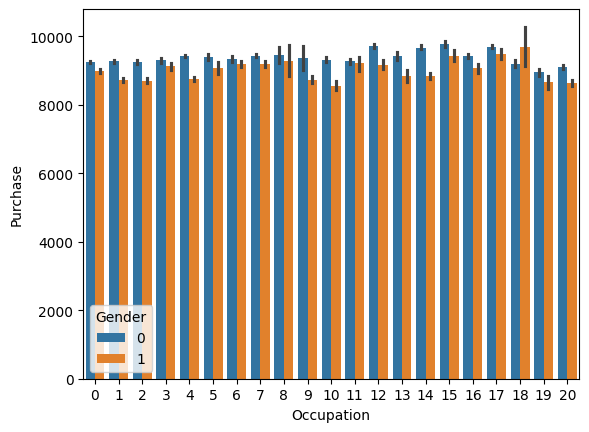

In [74]:
#visualizing occupation and purchase
sns.barplot(data=final_df,x=final_df['Occupation'],y=final_df['Purchase'],hue=final_df['Gender'])
plt.show()

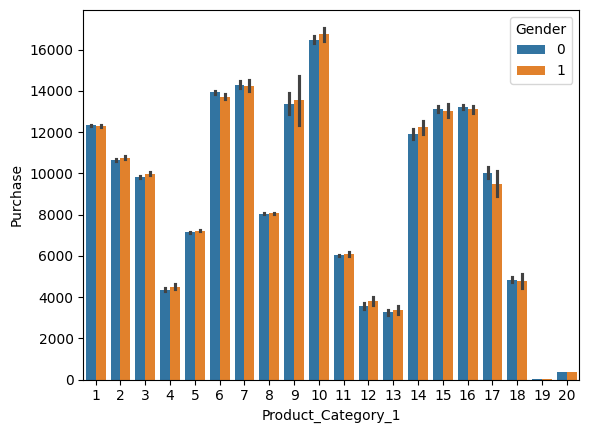

In [160]:
# Visualization Product category 1 and Purchased
sns.barplot(data=final_df,x=final_df['Product_Category_1'],y=final_df['Purchase'],hue=final_df['Gender'])
plt.show()

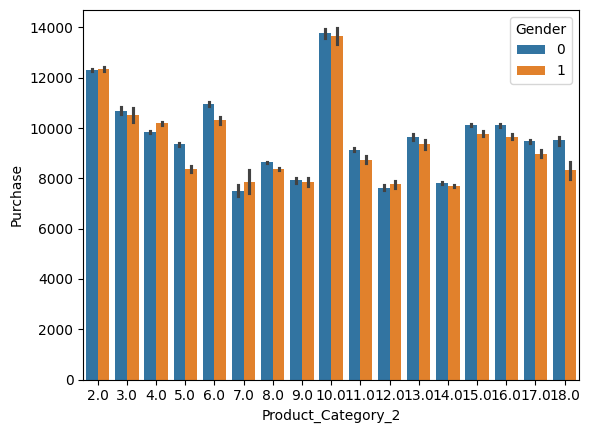

In [76]:
# Visualization Product category 2 and Purchased
sns.barplot(data=final_df,x=final_df['Product_Category_2'],y=final_df['Purchase'],hue=final_df['Gender'])
plt.show()

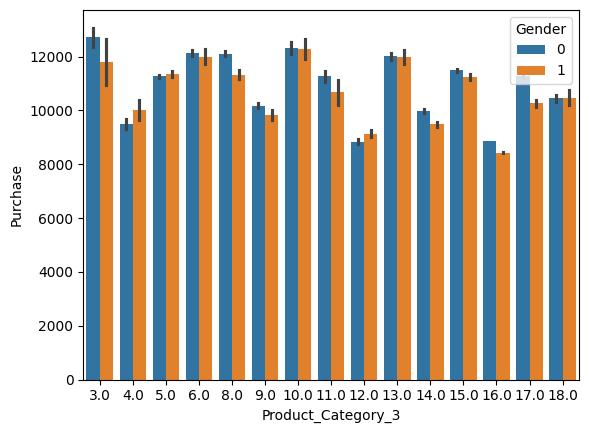

In [161]:
# Visualization Product category 3 and Purchased
sns.barplot(data=final_df,x=final_df['Product_Category_3'],y=final_df['Purchase'],hue=final_df['Gender'])
plt.show()

In [162]:
final_df.head(4)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,1,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,1,0,10,2,0,12,14.0,16.0,1057.0,0,0


In [163]:
blackfriday_test=final_df[final_df['Purchase'].isnull()]

In [164]:
blackfriday_train=final_df[~final_df['Purchase'].isnull()]

In [169]:
independent=blackfriday_train.drop('Purchase',axis=1)

In [185]:
independent=blackfriday_train.drop('Product_ID',axis=1)

In [186]:
independent.shape

(550068, 11)

In [187]:
independent

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,1,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,1,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,1,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,0,6,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,0,5,13,1,1,20,8.0,16.0,368.0,1,0
550064,1,2,1,3,0,20,8.0,16.0,371.0,0,1
550065,1,2,15,4,1,20,8.0,16.0,137.0,1,0
550066,1,6,1,2,0,20,8.0,16.0,365.0,0,1


In [181]:
dependent=blackfriday_train['Purchase']

In [182]:
dependent.shape

(550068,)

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     independent, dependent, test_size=0.33, random_state=42)

In [189]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)